In [125]:
%load_ext autoreload
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
# Some Setup
np.random.seed(0)
x1 = np.random.randint(10, size=6)
x2 = np.random.randint(10, size=(3,4))
x3 = np.random.randint(10, size=(3, 4, 5))

In [127]:
# Create a 3X3 array with uniformly distributed values between 0 and 1
np.random.random((3,3))  

array([[0.65279032, 0.63505887, 0.99529957],
       [0.58185033, 0.41436859, 0.4746975 ],
       [0.6235101 , 0.33800761, 0.67475232]])

In [128]:
# Create a 3X3 array with normally distributed random values between 0 and 1 with a mean of 0 and std of 1
np.random.normal(0, 1, (3,3))

array([[ 1.0657892 , -0.69993739,  0.14407911],
       [ 0.3985421 ,  0.02686925,  1.05583713],
       [-0.07318342, -0.66572066, -0.04411241]])

In [129]:
# Nested Lists result in multidimensional arrays
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [130]:
# An "empty" array with 10 zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<H1 style="color:CornflowerBlue;">Slicing and Indexing </H1>
<p>arrayName[ith Value]
<p>arrayName[row, column]
<p>arrayName[rowSlice, colSlice]

In [131]:
print(x1)
x1[2]

[5 0 3 3 7 9]


3

In [132]:
print(x2)
x2[0,2]

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


2

In [133]:
x = np.arange(10)
print(x)

# The first 5 elements
x[:5]

[0 1 2 3 4 5 6 7 8 9]


array([0, 1, 2, 3, 4])

In [134]:
# The elements after position 5
x[5:]

array([5, 6, 7, 8, 9])

In [135]:
# Every other element
x[::2]

array([0, 2, 4, 6, 8])

In [136]:
# Reverse the order of the elements
x[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [137]:
# The first two rows and the first three columns
print(x2)
x2[:2, :3]

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


array([[3, 5, 2],
       [7, 6, 8]])

In [138]:
# Return all of the values in the 3rd column as an array
x2[:, 2]

array([2, 8, 7])

In [139]:
# Return all of the values in the 2nd row
x2[1]

array([7, 6, 8, 8])

<b style="color:CornflowerBlue;"> Reshaping </b> (dimensionality change or tranposition) requires the same number of "cells" between the source and target arrays


In [140]:
grid = np.arange(1, 10).reshape((3,3))  # Note the 2 sets of (())
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [141]:
x = np.array([1,2,3])
print(x.reshape((3,1)))
print(x[np.newaxis, :])
print(x[:, np.newaxis])  # Equivalent to x.reshape((3,1))

[[1]
 [2]
 [3]]
[[1 2 3]]
[[1]
 [2]
 [3]]


In [142]:
# Setup
x = np.array([1,2,3])
y = np.array([4,5,6])
z = [99, 99, 99]
grid = ([[1, 2, 3],
         [4, 5, 6]])

print(np.concatenate([x,y]))
print(np.concatenate([x,y,z]))
print("Add as new rows")
print(np.concatenate([grid, grid]))
print("Add as new columns")
print(np.concatenate([grid, grid], axis=1))   

[1 2 3 4 5 6]
[ 1  2  3  4  5  6 99 99 99]
Add as new rows
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]
Add as new columns
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]]


In [143]:
# Split an array (also mutliple assignment)
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


<H1 style="color:CornflowerBlue;">Broadcasting</H1>

In [144]:
# Center an array around 0 (zero)
X = np.random.random((10, 3))
Xmean = X.mean(0)
X_centered = X - Xmean  #Broadcasting happens here
print(X_centered.mean(0))

[ 3.33066907e-17  1.33226763e-16 -2.22044605e-17]


In [145]:
# Broadcasting with Boolean condition matching
x = np.random.RandomState(0).randint(10, size=(3, 4))
print(x)
print(np.count_nonzero(x < 6))
print(np.sum(x < 6))

# How many values (as a count) are less than 6 in each row?
print(np.sum(x < 6, axis=1))

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]
8
8
[4 2 2]


In [146]:
# bool Masking
print(x)
y = x < 5
print(y)
print(x[y])
print(np.sum(x[y]))

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]
[[False  True  True  True]
 [False False  True False]
 [ True  True False False]]
[0 3 3 3 2 4]
15


In [147]:
# A Random 3 X 10 with random numbers between 0 and 1
X = np.arange(12).reshape((3, 4))
print(X)
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
print(X[row, col])  #Slicing by coordinate row:col Think x,y coordinates
print(row[:, np.newaxis] * col)  # Slicing and broadcasting the product
print(X[2, [2, 0, 1]])  # Give me the 2nd row's 3rd, 1st and 2nd value in an array. Remember array[row[], col[]]

mask = np.array([1, 0, 1, 0], dtype = bool)
X[row[:, np.newaxis], mask]  # Using masking and fancy indexing. Newaxis is used to increase the dimension of mask to 2
# Remember the shape of the output is the shape of the indexed array not the source array that is being indexed

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 2  5 11]
[[0 0 0]
 [2 1 3]
 [4 2 6]]
[10  8  9]


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [148]:
# This pattern is useful for binning data
a = np.array([1, 2, 3, 4])
b = np.array([1, 2])
np.add.at(a, [0, 1], b)  #Similar to a for loop within an array, add the elements from b to a at the specified indices (0 and 1 in this case)
print(a)

[2 4 3 4]


<H1 style="color:CornflowerBlue;">Sorting</H1>

In [149]:
# A sorted version of the array without modifying the input array
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [150]:
# To sort the input array in place
x = np.array([2, 1, 3, 4, 3, 5])
x.sort()
x

array([1, 2, 3, 3, 4, 5])

In [151]:
# Sort along columns
rand = np.random.RandomState(42)  # returns a 1D array filled with 42 random numbers
X = rand.randint(0, 10, (4, 6))   # returns a 4 X 6 array filled with randome numbers between 0 and 10 
print(X)

print()
# Sort within each column. Using X.sort() instead would sort with replacement
print(np.sort(X, axis=0))

print()
# Sort within each row
print(np.sort(X, axis=1))


[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]

[[2 1 4 0 1 5]
 [5 2 5 4 3 7]
 [6 3 7 4 6 7]
 [7 6 7 4 9 9]]

[[3 4 6 6 7 9]
 [2 3 4 6 7 7]
 [1 2 4 5 7 7]
 [0 1 4 5 5 9]]


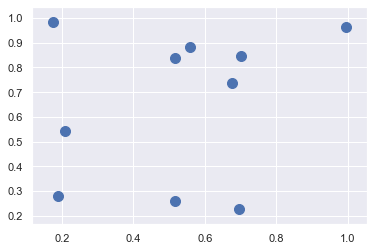

In [160]:
X = rand.rand(10, 2)  # Return a 10 X 2 array with random numbers between 0 and 1
# Allow the plot to be visible in this notebook below this code block
%matplotlib inline  
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  #plot styling
plt.scatter(X[:, 0], X[:, 1], s = 100)   # Plot all the values in the 1st column to all the values in the 2nd column

<H1 style="color:CornflowerBlue;">Compound Arrays</H1>

In [172]:
# Note: Compound (heterogenous element) arrays should be done in Pandas instead
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                 'formats':('U10', 'i4', 'f8')})
print(data)
print(data.shape)

data['name'] = name
data['age'] = age
data['weight'] = weight

print(data)


[('', 0, 0.) ('', 0, 0.) ('', 0, 0.) ('', 0, 0.)]
(4,)
[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]
